# **Analisis Hubungan Siswa Putus Sekolah dengan Jumlah Penduduk Miskin di Provinsi Jawa Barat**

Proyek ini bertujuan menganalisa hubungan antara banyaknya siswa putus sekolah dengan jumlah penduduk miskin di Jawa Barat dengan hasil akhir berupa sistem prediksi jumlah penduduk miskin jika berdasarkan banyaknya siswa putus sekolah.

# Pre-proses Data

Memuat dan memprose data yang diperlukan.

## Penduduk Miskin

### Memuat Data

In [187]:
import pandas as pd

miskin_kabkot = pd.read_csv('/content/drive/MyDrive/TSDN/bps-od_16425_jumlah_penduduk_miskin_berdasarkan_kabupatenkota_data.csv')
miskin_kabkot.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_penduduk_miskin,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,451.3,RIBU JIWA,2002
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,362.2,RIBU JIWA,2002
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,368.6,RIBU JIWA,2002
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,543.3,RIBU JIWA,2002
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,323.7,RIBU JIWA,2002


In [188]:
miskin_kabkot['tahun'].unique()

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [189]:
miskin_kabkot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      513 non-null    int64  
 1   kode_provinsi           513 non-null    int64  
 2   nama_provinsi           513 non-null    object 
 3   kode_kabupaten_kota     513 non-null    int64  
 4   nama_kabupaten_kota     513 non-null    object 
 5   jumlah_penduduk_miskin  513 non-null    float64
 6   satuan                  513 non-null    object 
 7   tahun                   513 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 32.2+ KB


In [190]:
miskin_kabkot['tahun'].unique()

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

### Transformasi Data

In [5]:
years = ['2017','2018','2019','2020']

In [6]:
miskin_kabkot_selected = miskin_kabkot.loc[(miskin_kabkot['tahun'] >= 2017)]
miskin_kabkot_selected = miskin_kabkot_selected[['nama_kabupaten_kota','jumlah_penduduk_miskin','tahun']]
miskin_kabkot_selected.reset_index(drop=True, inplace=True)
miskin_kabkot_selected.tail()

,nama_kabupaten_kota,jumlah_penduduk_miskin,tahun
103,KOTA BEKASI,134.01,2020
104,KOTA DEPOK,60.43,2020
105,KOTA CIMAHI,31.64,2020
106,KOTA TASIKMALAYA,86.13,2020
107,KOTA BANJAR,11.16,2020


In [7]:
miskin_kabkot_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   nama_kabupaten_kota     108 non-null    object 
 1   jumlah_penduduk_miskin  108 non-null    float64
 2   tahun                   108 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 2.7+ KB


In [8]:
miskin_peryear = []
for i, year in enumerate(years):
  year_data = miskin_kabkot_selected.loc[(miskin_kabkot_selected['tahun'] == int(year))]
  year_data.drop(['tahun'],axis=1)
  mis = year_data.groupby('nama_kabupaten_kota')['jumlah_penduduk_miskin'].sum()
  miskin_peryear.append(pd.DataFrame({'nama_kabupaten_kota':mis.index, 'jumlah_penduduk_miskin':mis.values*1000, 'tahun':year}))

miskin_peryear[0].head()

,nama_kabupaten_kota,jumlah_penduduk_miskin,tahun
0,KABUPATEN BANDUNG,268000.0,2017
1,KABUPATEN BANDUNG BARAT,190900.0,2017
2,KABUPATEN BEKASI,164000.0,2017
3,KABUPATEN BOGOR,487300.0,2017
4,KABUPATEN CIAMIS,96800.0,2017


In [9]:
miskin_peryear[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   nama_kabupaten_kota     27 non-null     object 
 1   jumlah_penduduk_miskin  27 non-null     float64
 2   tahun                   27 non-null     object 
dtypes: float64(1), object(2)
memory usage: 776.0+ bytes


## Siswa Putus Sekolah

### Memuat dan Membersihkan Data

In [10]:
import os

putus_path = '/content/drive/MyDrive/TSDN/Turnamen Sains Data Nasional'
putus_category = os.listdir(putus_path)

file_list = []
for folder in putus_category:
  if folder != 'Dataset':
    for file in os.listdir(os.path.join(putus_path, folder)):
      if file.endswith(".xlsx"):
          file_list.append(os.path.join(folder, file))

print(len(file_list))

16


In [11]:
print(file_list)

['SMK/stat-smk-table-2-wil-2020.xlsx', 'SMK/stat-smk-table-2-wil-2017.xlsx', 'SMK/stat-smk-table-2-wil-2018.xlsx', 'SMK/stat-smk-table-2-wil-2019.xlsx', 'SD/stat-sd-table-2-wil-020000_2017.xlsx', 'SD/stat-sd-table-2-wil-020000_2018.xlsx', 'SD/stat-sd-table-2-wil-020000_2019.xlsx', 'SD/stat-sd-table-2-wil-020000_2020.xlsx', 'SMA/stat-sma-table-2-wil-020000_2017.xlsx', 'SMA/stat-sma-table-2-wil-020000_2018.xlsx', 'SMA/stat-sma-table-2-wil-020000_2019.xlsx', 'SMA/stat-sma-table-2-wil-020000_2020.xlsx', 'SMP/stat-smp-table-2-wil-020000_2017.xlsx', 'SMP/stat-smp-table-2-wil-020000_2018.xlsx', 'SMP/stat-smp-table-2-wil-020000_2019.xlsx', 'SMP/stat-smp-table-2-wil-020000_2020.xlsx']


In [12]:
data_peryear = []
for year in years:
  df_temp = pd.DataFrame()
  for file in file_list:
    if year in file:
      df = pd.read_excel(os.path.join(putus_path,file))
      if 'SMA' in file:
        df = df.iloc[1:28,[0,4]]
      else:
        df = df.iloc[0:27,[1,5]]
      df.iloc[:,0] = df.iloc[:,0].str.replace(r'\s*\d+\s*','')
      df.iloc[:,0] = df.iloc[:,0].str.replace('Kab.','Kabupaten')
      df.columns = [''] * len(df.columns)
      df_temp = df_temp.append(df, ignore_index=True)
  data_peryear.append(df_temp)

In [13]:
data_peryear[2].head()

,,
0,Kabupaten Bogor,3216.0
1,Kabupaten Sukabumi,1324.0
2,Kabupaten Cianjur,2358.0
3,Kabupaten Bandung,1096.0
4,Kabupaten Sumedang,665.0


### Transformasi Data

In [14]:
for i, data in enumerate(data_peryear):
  data.columns =['nama_kabupaten_kota', 'jumlah_siswa']
  sis = data.groupby('nama_kabupaten_kota')['jumlah_siswa'].sum()
  data_peryear[i] = pd.DataFrame({'nama_kabupaten_kota':sis.index, 'jumlah_siswa':sis.values, 'tahun':2017+i})

data_peryear[0].head()

,nama_kabupaten_kota,jumlah_siswa,tahun
0,Kabupaten Bandung,2080.0,2017
1,Kabupaten Bandung Barat,1020.0,2017
2,Kabupaten Bekasi,1730.0,2017
3,Kabupaten Bogor,3612.0,2017
4,Kabupaten Ciamis,749.0,2017


In [15]:
data_peryear[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   nama_kabupaten_kota  27 non-null     object 
 1   jumlah_siswa         27 non-null     float64
 2   tahun                27 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 776.0+ bytes


In [16]:
for ye, d in enumerate(data_peryear):
  d.to_csv('putus_sekolah_'+str(ye+2017)+'.csv')

# Eksploratory Data Analysis

In [17]:
import seaborn as sns

## Perbandingan Jumlah Penduduk Miskin

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


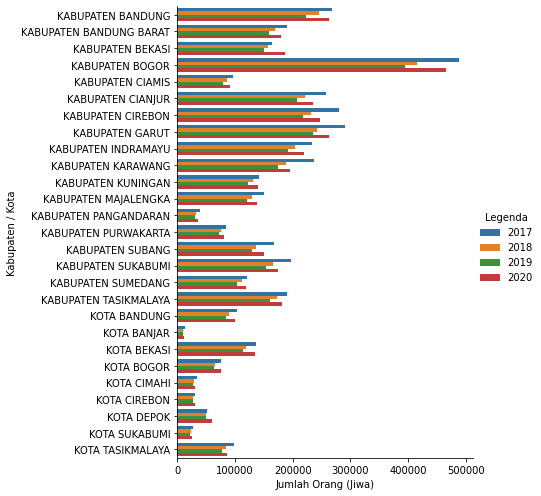

In [18]:
data_miskin = {'Kabupaten / Kota': miskin_peryear[0]['nama_kabupaten_kota'],
        '2017':miskin_peryear[0]['jumlah_penduduk_miskin'],
        '2018':miskin_peryear[1]['jumlah_penduduk_miskin'],
        '2019':miskin_peryear[2]['jumlah_penduduk_miskin'],
        '2020':miskin_peryear[3]['jumlah_penduduk_miskin'],}

data_df = pd.DataFrame.from_dict(data_miskin)
vis_df = pd.melt(data_df, id_vars="Kabupaten / Kota", var_name="Legenda", value_name="Jumlah Orang (Jiwa)")

sns.factorplot(x='Jumlah Orang (Jiwa)', y='Kabupaten / Kota', hue='Legenda', data=vis_df, kind='bar', height=7, aspect=1, legend_out=True)


## Perbandingan Jumlah Siswa Putus Sekolah

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


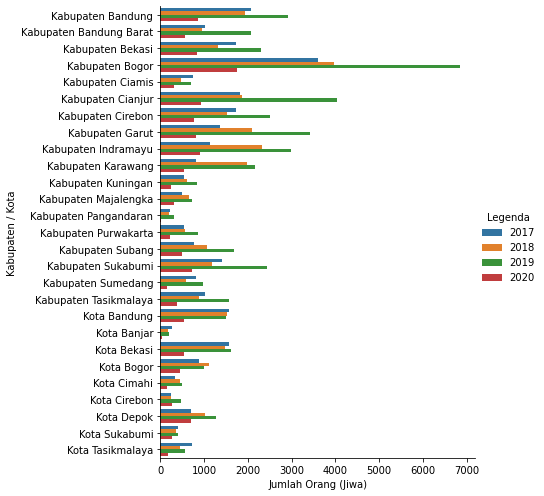

In [19]:
data_putus = {'Kabupaten / Kota': data_peryear[0]['nama_kabupaten_kota'],
        '2017':data_peryear[0]['jumlah_siswa'],
        '2018':data_peryear[1]['jumlah_siswa'],
        '2019':data_peryear[2]['jumlah_siswa'],
        '2020':data_peryear[3]['jumlah_siswa'],}

putus_df = pd.DataFrame.from_dict(data_putus)
putusvis_df = pd.melt(putus_df, id_vars="Kabupaten / Kota", var_name="Legenda", value_name="Jumlah Orang (Jiwa)")

sns.factorplot(x='Jumlah Orang (Jiwa)', y='Kabupaten / Kota', hue='Legenda', data=putusvis_df, kind='bar', height=7, aspect=1, legend_out=True)

## Korelasi Antara Jumlah Penduduk Miskin dan Siwa Putus Sekolah

### Korelasi per tahun

Text(0, 0.5, 'Siswa Putus Sekolah')

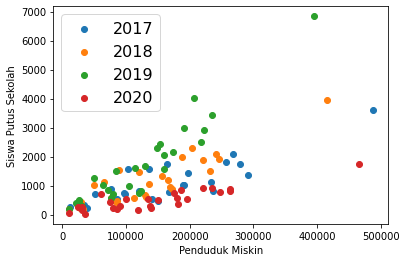

In [20]:
import matplotlib.pyplot as plt

for col in data_df.columns:
  if col != 'Kabupaten / Kota':
    plt.scatter(data_df[col], putus_df[col], label=col)
plt.legend(loc='best', fontsize=16)
plt.xlabel('Penduduk Miskin')
plt.ylabel('Siswa Putus Sekolah')

In [21]:
from scipy.stats import pearsonr

corr_peryear = []

for col in data_df.columns:
  if col != 'Kabupaten / Kota':
    corr, _ = pearsonr(data_df[col],putus_df[col])
    corr_peryear.append(corr)

In [22]:
print(corr_peryear)

[0.8538864801521794, 0.8900669499732766, 0.9398784771865196, 0.8855359239955529]


korelasi 2 variabel terbukti positif jika diambil dari data per tahun.

### Korelasi per Kabupaten / Kota

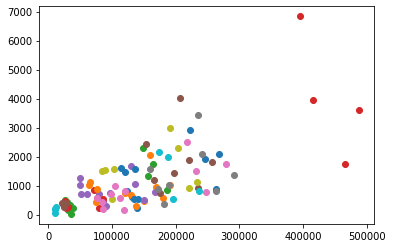

In [23]:
corr_perkabkot = []

for index, row in data_df.iterrows():
  plt.scatter(data_df.iloc[index,1:].values, putus_df.iloc[index,1:].values)
  corr, _ = pearsonr(data_df.iloc[index,1:].values, putus_df.iloc[index,1:].values)
  corr_perkabkot.append(corr)

In [24]:
print(corr_perkabkot)

[-0.745144702446928, -0.6862835987457271, -0.8553547971705079, -0.7482446385527696, -0.04461484645104596, -0.6566705348915026, -0.3762257270607191, -0.7071287969812792, -0.92696379402726, -0.6745900479171749, -0.7958251496041475, -0.6895537262353707, -0.39211743543092414, -0.584163762755269, -0.724059234650977, -0.49800105416051016, -0.5269190866180208, -0.6382512827396745, -0.342389431993724, 0.3686900758886358, -0.506161800863846, -0.7051373859646337, -0.5797576556970803, -0.7244689481982314, -0.7062838547674946, -0.2498144800092544, 0.35627480243070214]


namun korelasi menjadi bias dan kebanyakan negatif jika melihat per kabupaten / kota karena jumlah data yang sedikit (hanya ada data 4 tahun kebelakang).

# Menyiapkan Data untuk Regresi

## Menyatukan Data

In [71]:
mis = []
put = []
for col in data_df.columns:
  if col != 'Kabupaten / Kota':
    mis.extend(data_df[col])
    put.extend(putus_df[col])

whole_data = {'miskin':mis, 'putus':put}
whole_data_df = pd.DataFrame.from_dict(whole_data)

In [72]:
whole_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   miskin  108 non-null    float64
 1   putus   108 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


## Menghapus Outlier

In [73]:
import numpy as np
from scipy import stats

z_scores = stats.zscore(whole_data_df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = whole_data_df[filtered_entries]
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   miskin  105 non-null    float64
 1   putus   105 non-null    float64
dtypes: float64(2)
memory usage: 2.5 KB


In [87]:
X = np.array([new_df['putus']]).reshape((105,1))
y = np.array([new_df['miskin']]).reshape((105,1))
X.shape

(105, 1)

In [88]:
y.shape

(105, 1)

# Membagi data untuk Train dan Test

Meski nantinya model akan menggunakan Cross Validation, namun pembagian data ini digunakan untuk testing akhir performa tiap model.

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [90]:
X_train.shape

(84, 1)

In [91]:
X_test.shape

(21, 1)

# Melatih dan Mengevaluasi Model

Karena melakukan prediksi nilai variabel dengan referensi nilai variabel lain (hubungan 2 variabel) maka model yang digunakan adalah **model linear**.

## Linear Regression

In [192]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Evaluasi Model

In [93]:
model.score(X_test, y_test)

0.4432848040177468

In [96]:
y_predicted = model.predict(X_test)

In [97]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

print('MAE : '+str(mean_absolute_error(y_test, y_predicted)))
print('MSE : '+str(mean_squared_error(y_test, y_predicted)))
print('RMSE : '+str(math.sqrt(mean_squared_error(y_test, y_predicted))))

MAE : 58588.8247686814
MSE : 4762695853.128218
RMSE : 69012.28769667195


### Visualisasi Model

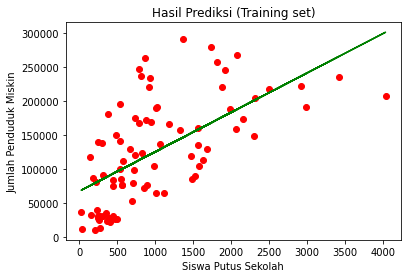

In [118]:
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, model.predict(X_train), color = "green")
plt.title("Hasil Prediksi (Training set)")
plt.xlabel("Siswa Putus Sekolah")
plt.ylabel("Jumlah Penduduk Miskin")
plt.show()

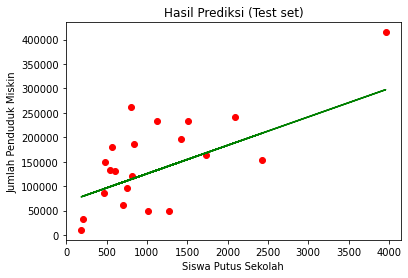

In [193]:
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_test, model.predict(X_test), color = "green")
plt.title("Hasil Prediksi (Test set)")
plt.xlabel("Siswa Putus Sekolah")
plt.ylabel("Jumlah Penduduk Miskin")
plt.show()

## Ridge Regression dengan GridSearchCV

In [161]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

ri = Ridge()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [162]:
space = dict()
space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]

In [163]:
search = GridSearchCV(ri, space, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)

In [169]:
result = search.fit(X, y)

### Evaluasi Model

In [170]:
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -53170.41348091585
Best Hyperparameters: {'alpha': 0.1, 'fit_intercept': True, 'normalize': True, 'solver': 'sag'}


In [171]:
clf_best = result.best_estimator_
clf_best.score(X_test,y_test)

0.4553461218563493

In [172]:
y_predicted = clf_best.predict(X_test)

In [173]:
print('MAE : '+str(mean_absolute_error(y_test, y_predicted)))
print('MSE : '+str(mean_squared_error(y_test, y_predicted)))
print('RMSE : '+str(math.sqrt(mean_squared_error(y_test, y_predicted))))

MAE : 58167.21588230129
MSE : 4659511336.399121
RMSE : 68260.61336084756


### Visualisasi Model

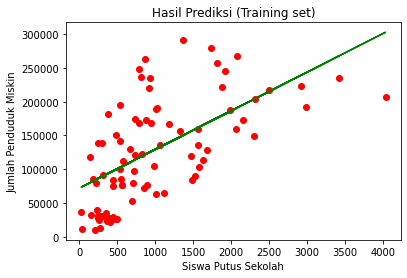

In [174]:
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, clf_best.predict(X_train), color = "green")
plt.title("Hasil Prediksi (Training set)")
plt.xlabel("Siswa Putus Sekolah")
plt.ylabel("Jumlah Penduduk Miskin")
plt.show()

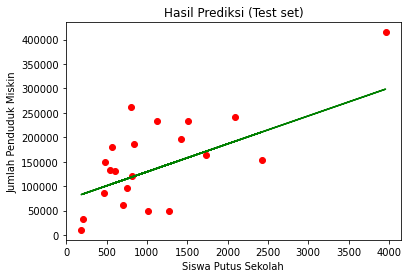

In [194]:
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_test, clf_best.predict(X_test), color = "green")
plt.title("Hasil Prediksi (Test set)")
plt.xlabel("Siswa Putus Sekolah")
plt.ylabel("Jumlah Penduduk Miskin")
plt.show()

## Lasso Regression dengan GridSearchCV

In [177]:
from sklearn.linear_model import Lasso

l = Lasso()
alphas = np.array([5, 0.5, 0.05, 0.005, 0.0005, 1, 0.1, 0.01, 0.001, 0.0001, 0 ])
par = dict(alpha=alphas)

In [178]:
gs = GridSearchCV(l, par, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)

In [179]:
l_gs = gs.fit(X, y)

### Evaluasi Model

In [180]:
print('Best Score: %s' % l_gs.best_score_)
print('Best Hyperparameters: %s' % l_gs.best_params_)

Best Score: -53417.53405827362
Best Hyperparameters: {'alpha': 5.0}


In [181]:
l_gs.best_estimator_.score(X_test,y_test)

0.47471088616411217

In [183]:
y_predicted = l_gs.best_estimator_.predict(X_test)

In [184]:
print('MAE : '+str(mean_absolute_error(y_test, y_predicted)))
print('MSE : '+str(mean_squared_error(y_test, y_predicted)))
print('RMSE : '+str(math.sqrt(mean_squared_error(y_test, y_predicted))))

MAE : 57369.11098732493
MSE : 4493845869.8715515
RMSE : 67036.15345372638


### Visualisasi Model

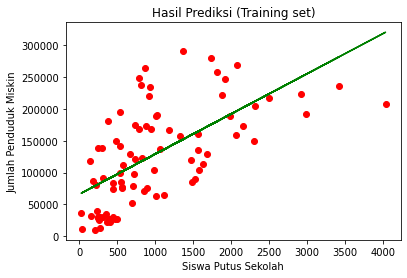

In [185]:
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, l_gs.best_estimator_.predict(X_train), color = "green")
plt.title("Hasil Prediksi (Training set)")
plt.xlabel("Siswa Putus Sekolah")
plt.ylabel("Jumlah Penduduk Miskin")
plt.show()

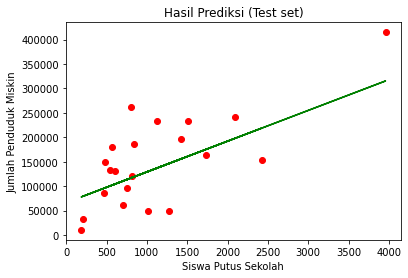

In [195]:
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_test, l_gs.best_estimator_.predict(X_test), color = "green")
plt.title("Hasil Prediksi (Test set)")
plt.xlabel("Siswa Putus Sekolah")
plt.ylabel("Jumlah Penduduk Miskin")
plt.show()

# Kesimpulan

Dari hasil EDA (Eksploratory data analysis) diketahui bahwa dari data 4 tahun bahwa jumlah siswa putus sekolah dan jumlah penduduk miskin **berkorelasi positif** dengan **nilai koefisien korelasi Pearson bernilai diantara 0,89 - 0,9** yang mana menunjukan bahwa 2 variabel tersebut sangat berpengaruh satu sama lain. Lalu dari hasi pelatihan model, didapat bahwa model Lasso regression yang sudah di fine tuning menggunakan GridSearchCV merupakan model terbaik dengan **r2 score sebesar 0,47 dan RMSE sebesar 67036.15** . Meski masih belum terlalu baik, namun model tersebut dibuat dengan data yang masih sedikit (4 tahun) sehingga model ini masih berpotensi untuk peningkatan kedepannya.